### Assignment 1
Submitted By: Ishan Ghosh, B170473CS, CSE

### 2) 
Write a program to implement k-means clustering algorithm by using Iris data set (available in UCI Machine learning repository) and find the followings:

i) Clusters of the Iris data set (final clustering solution). 

ii) Sum of the Intra-Cluster Distances (SICD) or Sum of the Squired Error (SSE) valuesof the obtained clustering solution. 

iii)Graphical representation of the obtained clusters.

iv)Give 150 iterations of theimplemented k-means by changing the initial centroids and see the changes in the clusteringsolution(SICD values).

v)Plot iteration vs. SICD values.

In [1]:
# libraries for loading data and graph plotting
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import style
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

style.use('ggplot')

In [2]:
iris = datasets.load_iris()
# reading and shuffling input
X, y = shuffle(iris.data, iris.target, random_state=1126) # random_state is done so that results can be reporduced
X = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(y, columns=['Target'])

In [3]:
print("Iris Data (1st 10 after shuffling): ")
print(X[:10])

Iris Data (1st 10 after shuffling): 
   Sepal Length  Sepal Width  Petal Length  Petal Width
0           4.4          3.2           1.3          0.2
1           6.0          2.7           5.1          1.6
2           5.0          3.0           1.6          0.2
3           6.9          3.1           5.1          2.3
4           7.7          3.8           6.7          2.2
5           6.7          3.1           4.4          1.4
6           4.4          3.0           1.3          0.2
7           6.4          3.2           5.3          2.3
8           6.4          3.1           5.5          1.8
9           6.3          2.3           4.4          1.3


In [4]:
import matplotlib.patches as mpatches

# color cordination of clusters
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

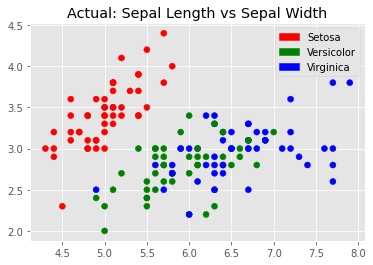

In [5]:
X_actual = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y_actual = pd.DataFrame(y, columns=['Target'])

plt.scatter(X_actual['Sepal Length'], X_actual['Sepal Width'], c=colors[y_actual['Target']])
plt.title('Actual: Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

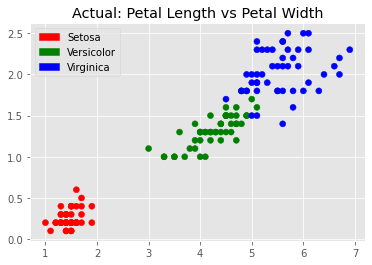

In [6]:
plt.scatter(X_actual['Petal Length'], X_actual['Petal Width'], c=colors[y_actual['Target']])
plt.title('Actual: Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

In [7]:
class KMeans:
    # centroids
    centroids = {}
    # all sicd values
    sicds = []
    # clusters
    classes = {}
    # pred
    pred = []
    
    
    def __init__(self, k=3, tolerance=0.0001, max_iterations=500):
        self.k = k # no. of clusters
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        
    def calc_distance(self, X1, X2):
        # calculate euclidean distance
        vector_diff_squared = (X1 - X2)**2
        dist_squared = 0
        for xi in vector_diff_squared:
            dist_squared += xi
        dist = dist_squared**0.5
        return dist
    
    def min_val(self, arr):
        val = arr[0]
        for e in arr:
            if e < val:
                val = e
        return val
    
    def average(self, v):
        sum_val = np.zeros(v[0].size)
        for x in v:
            sum_val += x
        return sum_val / len(v)
            
    
    def fit(self, data, centroids):
        for i in range(self.k):
            self.centroids[i] = centroids[i]
        
        # begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            self.pred = []
            for i in range(self.k):
                self.classes[i] = []

            # find the distance between the point and the cluster
            # choose the nearest centroid
            sicd = 0
            for values in data:
                distances = [self.calc_distance(values, self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(self.min_val(distances))
                self.classes[classification].append(values)
                self.pred.append(classification)
                sicd += (self.min_val(distances))**2

            self.sicds.append(sicd)
            previous = dict(self.centroids)

            # take the average of the cluster datapoints
            # recalculate the centroids
            for classification in self.classes:
                self.centroids[classification] = self.average(self.classes[classification])

            isOptimal = True
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                current_centroid = self.centroids[centroid]
                if np.sum((current_centroid - original_centroid) / original_centroid ) > self.tolerance:
                    isOptimal = False

            if isOptimal:
                break

In [8]:
# K means clustering on iris dataset
km = KMeans(3, 0.0001, 500)
# a random sample chosen as centroid
centroids = X.sample(n=3, random_state=1608)
print(centroids)
km.fit(X.values, centroids.values)

    Sepal Length  Sepal Width  Petal Length  Petal Width
6            4.4          3.0           1.3          0.2
73           6.0          2.2           4.0          1.0
69           5.6          2.7           4.2          1.3


In [9]:
print('Setosa:')
print(np.array(km.classes[0]))
print('')
print('Versicolor:')
print(np.array(km.classes[1]))
print('')
print('Virginica:')
print(np.array(km.classes[2]))

Setosa:
[[4.4 3.2 1.3 0.2]
 [5.  3.  1.6 0.2]
 [4.4 3.  1.3 0.2]
 [5.2 3.4 1.4 0.2]
 [4.8 3.  1.4 0.1]
 [4.9 3.6 1.4 0.1]
 [5.2 4.1 1.5 0.1]
 [5.4 3.9 1.7 0.4]
 [5.1 3.8 1.6 0.2]
 [5.  3.6 1.4 0.2]
 [4.6 3.4 1.4 0.3]
 [5.1 3.4 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [5.8 4.  1.2 0.2]
 [5.1 3.8 1.5 0.3]
 [5.4 3.7 1.5 0.2]
 [5.  3.4 1.6 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.3 1.7 0.5]
 [5.  3.5 1.3 0.3]
 [4.9 3.1 1.5 0.2]
 [5.1 3.7 1.5 0.4]
 [4.9 3.  1.4 0.2]
 [5.5 3.5 1.3 0.2]
 [4.8 3.1 1.6 0.2]
 [5.3 3.7 1.5 0.2]
 [4.7 3.2 1.6 0.2]
 [5.2 3.5 1.5 0.2]
 [5.  3.4 1.5 0.2]
 [5.5 4.2 1.4 0.2]
 [5.4 3.4 1.5 0.4]
 [5.  3.3 1.4 0.2]
 [4.4 2.9 1.4 0.2]
 [5.1 3.5 1.4 0.2]
 [5.  3.5 1.6 0.6]
 [4.6 3.2 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [5.4 3.4 1.7 0.2]
 [4.7 3.2 1.3 0.2]
 [4.8 3.4 1.9 0.2]
 [5.4 3.9 1.3 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.5 1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [4.5 2.3 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  3.2 1.2 0.2]
 [5.7 3.8 1.7 0.3]
 [4.3 3.  1.1 0.1]
 [4.8 3.4 1.6 0.2]]

Versicolor:
[[6.  2.7 5.1 1.6]
 [6.7 3.1

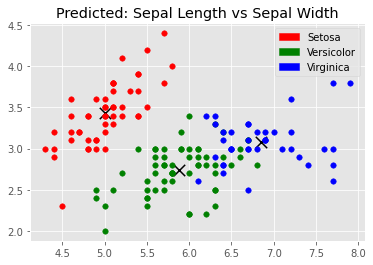

Centroids: [Sepal Length, Sepal Width]
[5.006 3.428] Setosa
[5.88360656 2.74098361] Versicolor
[6.85384615 3.07692308] Virginica


In [10]:
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s=130, marker='x', color='black')
    
for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color=color, s=30)

plt.title('Predicted: Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

print('Centroids: [Sepal Length, Sepal Width]')
print(km.centroids[0][:2], 'Setosa')
print(km.centroids[1][:2], 'Versicolor')
print(km.centroids[2][:2], 'Virginica')

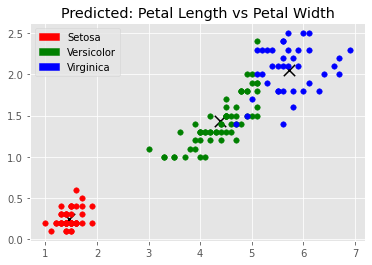

Centroids: [Petal Length, Petal Width]
[1.462 0.246] Setosa
[4.38852459 1.43442623] Versicolor
[5.71538462 2.05384615] Virginica


In [11]:
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][2], km.centroids[centroid][3], s=130, marker='x', color='black')
    
for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
            plt.scatter(features[2], features[3], color=color, s=30)

plt.title('Predicted: Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

print('Centroids: [Petal Length, Petal Width]')
print(km.centroids[0][2:4], 'Setosa')
print(km.centroids[1][2:4], 'Versicolor')
print(km.centroids[2][2:4], 'Virginica')

In [12]:
print('SICD Error:')
print(km.sicds[-1])

SICD Error:
78.85566582597727


[293.25000000000006, 108.17299636149968, 85.6103010807329, 84.26527300347222, 83.39023263888889, 82.00418738904196, 81.08093414092328, 79.87357983461304, 79.34436414532671, 78.92130972222226, 78.85566582597727]


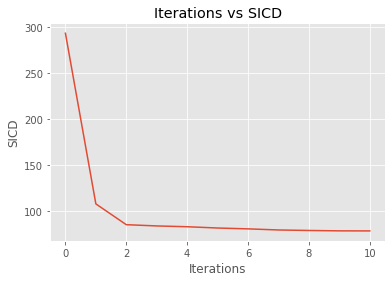

In [13]:
print(km.sicds)
# plot iterations vs SICD
plt.plot(km.sicds)
plt.xlabel('Iterations')
plt.ylabel('SICD')
plt.title('Iterations vs SICD')
plt.show()

In [14]:
print('Actual: ')
print(y.values.flatten())
print('Predicted: ')
print(np.array(km.pred))
from sklearn.metrics import accuracy_score
print('Accuracy Score: ')
print(accuracy_score(y.values.flatten(), np.array(km.pred)))

Actual: 
[0 1 0 2 2 1 0 2 2 1 0 1 0 0 0 1 1 2 1 0 2 0 2 1 2 0 2 0 1 0 2 2 1 1 0 2 2
 1 2 0 0 1 2 0 0 1 0 0 0 1 2 1 2 0 0 1 1 2 0 2 2 2 0 1 2 0 2 0 1 1 1 1 2 1
 2 0 1 1 2 0 2 0 0 1 0 1 1 2 2 0 0 1 0 1 1 0 2 2 0 1 1 0 2 2 1 0 2 2 0 0 0
 1 2 0 0 1 2 2 1 2 0 1 1 2 0 0 0 2 1 1 1 0 1 2 1 1 2 1 1 2 1 2 0 2 2 2 2 0
 2 1]
Predicted: 
[0 1 0 2 2 1 0 2 2 1 0 1 0 0 0 1 1 2 1 0 2 0 1 1 2 0 2 0 2 0 2 2 1 1 0 2 2
 1 2 0 0 1 1 0 0 1 0 0 0 1 1 1 2 0 0 1 2 2 0 2 2 2 0 1 2 0 2 0 1 1 1 1 2 1
 1 0 1 1 1 0 2 0 0 1 0 1 1 2 2 0 0 1 0 1 1 0 2 1 0 1 1 0 1 2 1 0 1 2 0 0 0
 1 2 0 0 1 1 1 1 1 0 1 1 2 0 0 0 2 1 1 1 0 1 2 1 1 2 1 1 1 2 2 0 2 1 2 1 0
 2 1]
Accuracy Score: 
0.8866666666666667


In [15]:
all_sicd = []
for i in range(0, 150):
    km = KMeans(3, 0.0001, 500)
    centroids = X.sample(n=3)
    km.fit(X.values, centroids.values)
    all_sicd.append(km.sicds[-1])
    print(km.sicds[-1])

142.75352002164502
79.94296484823067
78.85566582597727
78.85566582597727
78.91005673645704
142.75406250000003
142.75406250000003
78.85566582597727
83.03135288214656
79.08933384723103
78.85566582597727
100.36092267926901
78.85566582597727
78.85566582597727
79.23994037811198
84.42677023298734
85.38850262169848
87.9078790079292
78.85566582597727
78.85566582597727
142.75406250000003
78.85566582597727
78.85566582597727
97.90864088759703
144.18028133994173
78.85566582597727
724.4599999999999
913.15
85.40412797987419
78.85566582597727
156.50037576763913
135.91
142.75406250000003
78.85144142614601
142.75406250000003
78.85566582597727
179.6624049316645
78.85566582597727
142.75406250000003
142.75406250000003
79.45325845536892
78.85566582597727
146.56237806970435
78.85566582597727
145.45269176485024
78.85566582597727
96.56873570570046
78.85566582597727
165.9929526041666
79.88953050479627
142.75406250000003
144.50920116890774
78.85566582597727
381.21000000000015
142.75406250000003
143.239999999999

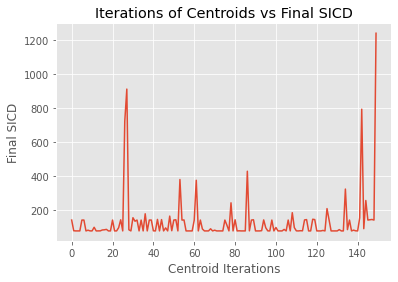

In [16]:
# All iterations
plt.plot(all_sicd)
plt.xlabel('Centroid Iterations')
plt.ylabel('Final SICD')
plt.title('Iterations of Centroids vs Final SICD')
plt.show()

In [17]:
print(min(all_sicd))

78.85144142614601
